In [2]:
import numpy as np
import warnings
warnings.simplefilter('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import subprocess

In [3]:
###

## From PyTorch source code

###
import torch
from torch.nn._functions.padding import ConstantPadNd
import torch.nn.functional as F

avg_pool2d = torch._C._nn.avg_pool2d
avg_pool3d = torch._C._nn.avg_pool3d

def local_response_norm(input, size, alpha=1e-4, beta=0.75, k=1):
    r"""Applies local response normalization over an input signal composed of
    several input planes, where channels occupy the second dimension.
    Applies normalization across channels.
    See :class:`~torch.nn.LocalResponseNorm` for details.
    """
    dim = input.dim()
    if dim < 3:
        raise ValueError('Expected 3D or higher dimensionality \
                         input (got {} dimensions)'.format(dim))
    div = input.mul(input).unsqueeze(1)
    if dim == 3:
        div = F.pad(div, (0, 0, size // 2, (size - 1) // 2))
        div = avg_pool2d(div, (size, 1), stride=1).squeeze(1)
    else:
        sizes = input.size()
        div = div.view(sizes[0], 1, sizes[1], sizes[2], -1)
        div = F.pad(div, (0, 0, 0, 0, size // 2, (size - 1) // 2))
        div = avg_pool3d(div, (size, 1, 1), stride=1).squeeze(1)
        div = div.view(sizes)
    div = div.mul(alpha).add(k).pow(beta)
    return input / div


In [4]:
images_list = subprocess.getoutput('ls images/').split('\n')
images = [plt.imread('images/'+i) for i in images_list

In [7]:
images = [i.transpose((2,0,1)) for i in images]

In [14]:
images_tensor = torch.Tensor([i for i in images])

In [45]:
from PIL import Image as pim

In [38]:
test = local_response_norm(torch.Tensor([images_tensor[2].numpy()]),3)

In [39]:
test.max(),test.min()

(tensor(90.7183), tensor(0.))

In [59]:
images_lrn = local_response_norm(images_tensor,3).numpy().transpose((0,2,3,1))

for i in range(8):
    temp = images_lrn[i]
    scaled_temp = (temp - temp.min())/(temp.max() - temp.min())
    plt.imsave('{}_lrn.png'.format(i),scaled_temp)

In [55]:
ll = pp[2]

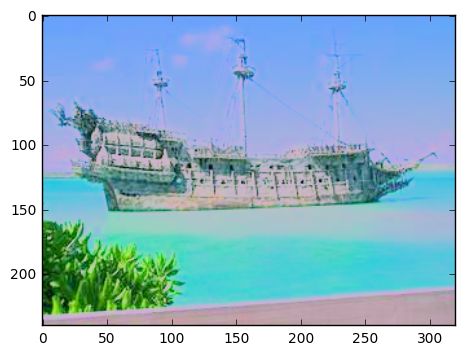

In [58]:
plt.imshow((ll - ll.min())/(ll.max() - ll.min()))  ## Scaling the image